In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [30]:
data = pd.read_csv('./AppleStore.csv')
data.head()

Unnamed: 0         id                                         track_name  \
0           1  281656475                                    PAC-MAN Premium   
1           2  281796108                          Evernote - stay organized   
2           3  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   
3           4  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   
4           5  282935706                                              Bible   

   size_bytes currency  price  rating_count_tot  rating_count_ver  \
0   100788224      USD   3.99             21292                26   
1   158578688      USD   0.00            161065                26   
2   100524032      USD   0.00            188583              2822   
3   128512000      USD   0.00            262241               649   
4    92774400      USD   0.00            985920              5320   

   user_rating  user_rating_ver     ver cont_rating   prime_genre  \
0          4.0              4.5   6.3.5          4+         Games   
1          4.0              3.5   8.2.2          4+  Productivity   
2          3.5              4.5   5.0.0          4+       Weather   
3          4.0              4.5  5.10.0         12+      Shopping   
4          4.5              5.0   7.5.1          4+     Reference   

   sup_devices.num  ipadSc_urls.num  lang.num  vpp_lic  
0               38                5        10        1  
1               37                5        23        1  
2               37                5         3        1  
3               37                5         9        1  
4               37                5        45        1

In [31]:
num_cols = [
    'size_bytes',
    'price',
    'rating_count_tot',
    'rating_count_ver',
    'sup_devices.num',
    'ipadSc_urls.num',
    'lang.num',
    # Эта фича - не числовая, а порядковая, но мы все равно возьмем ее как числовую для удобства
    'cont_rating',
]

cat_cols = [
    'currency',
    'prime_genre'
]

target_col = 'user_rating'

cols = num_cols + cat_cols + [target_col]

In [32]:
data = data[cols]
# Возраст записан не в виде числа, исправим это, вырезав последний символ и скастовав к числу
data['cont_rating'] = data['cont_rating'].str.slice(0, -1).astype(int)
data.head()

size_bytes  price  rating_count_tot  rating_count_ver  sup_devices.num  \
0   100788224   3.99             21292                26               38   
1   158578688   0.00            161065                26               37   
2   100524032   0.00            188583              2822               37   
3   128512000   0.00            262241               649               37   
4    92774400   0.00            985920              5320               37   

   ipadSc_urls.num  lang.num  cont_rating currency   prime_genre  user_rating  
0                5        10            4      USD         Games          4.0  
1                5        23            4      USD  Productivity          4.0  
2                5         3            4      USD       Weather          3.5  
3                5         9           12      USD      Shopping          4.0  
4                5        45            4      USD     Reference          4.5

In [33]:
# Посмотрим на пропущенные значения
data.isna().mean()

size_bytes          0.0
price               0.0
rating_count_tot    0.0
rating_count_ver    0.0
sup_devices.num     0.0
ipadSc_urls.num     0.0
lang.num            0.0
cont_rating         0.0
currency            0.0
prime_genre         0.0
user_rating         0.0
dtype: float64

In [34]:
for col in cat_cols:
    print(f"{col} DISTRIBUTION")
    print(data[col].value_counts())
    print()

currency DISTRIBUTION
USD    7197
Name: currency, dtype: int64

prime_genre DISTRIBUTION
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64



In [35]:
# Как мы видим, в колонке currency только одно значение, можно колонку убрать
data = data.drop(columns=['currency'])
cat_cols.remove('currency')

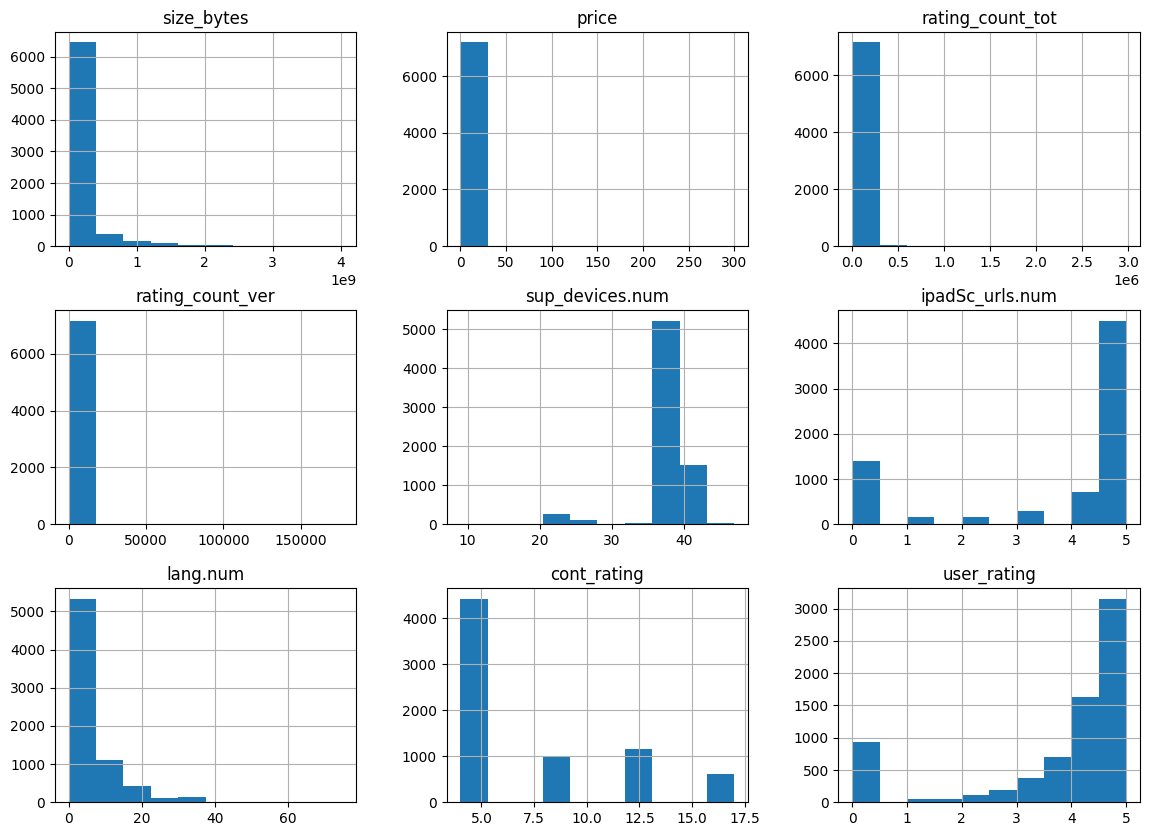

In [36]:
# Посмотрим на распредление величин
data.hist(column=num_cols+cat_cols+[target_col], figsize=(14, 10))
None

In [37]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


C:\Users\2001n\AppData\Local\Temp\ipykernel_21392\746961962.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
C:\Users\2001n\AppData\Local\Temp\ipykernel_21392\746961962.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


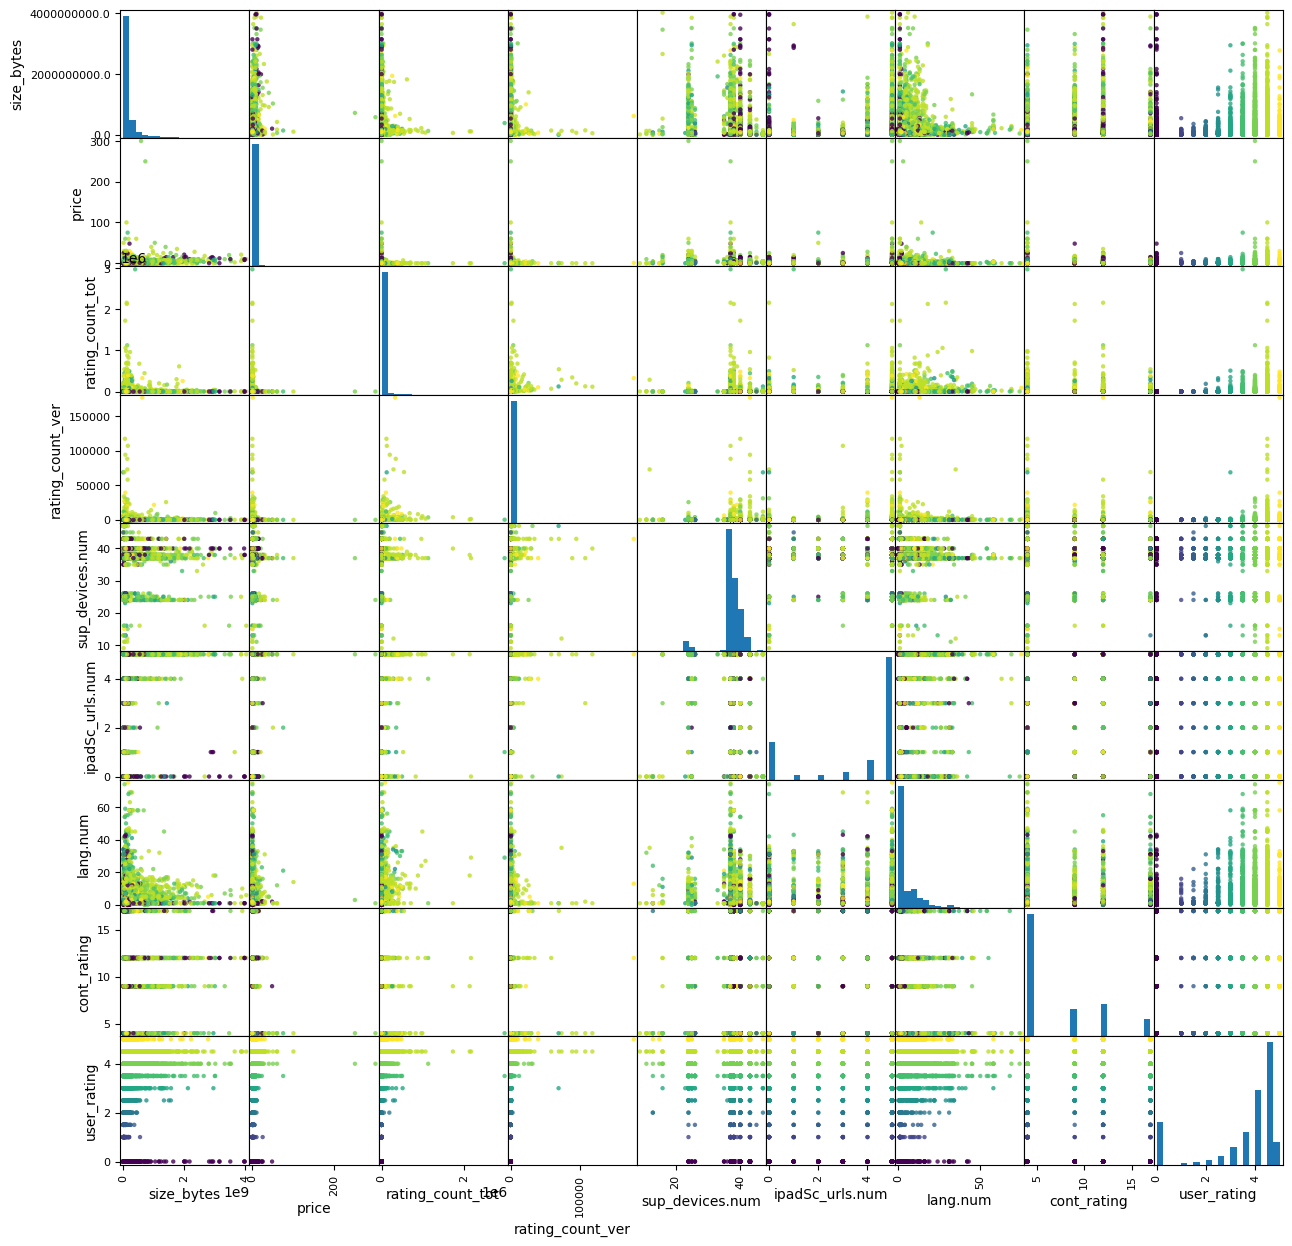

In [38]:
pd.plotting.scatter_matrix(data, c=data[target_col], figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=10, alpha=.8)
None

In [39]:
# Добавим категориальную фичу, которая говорит, бесплатное приложение или нет
data['is_free'] = data['price'] == 0
cat_cols.append('is_free')
data.head()

size_bytes  price  rating_count_tot  rating_count_ver  sup_devices.num  \
0   100788224   3.99             21292                26               38   
1   158578688   0.00            161065                26               37   
2   100524032   0.00            188583              2822               37   
3   128512000   0.00            262241               649               37   
4    92774400   0.00            985920              5320               37   

   ipadSc_urls.num  lang.num  cont_rating   prime_genre  user_rating  is_free  
0                5        10            4         Games          4.0    False  
1                5        23            4  Productivity          4.0     True  
2                5         3            4       Weather          3.5     True  
3                5         9           12      Shopping          4.0     True  
4                5        45            4     Reference          4.5     True

In [40]:
a = pd.DataFrame.from_dict({'categorical': ['a', 'b', 'a', 'c']})
a

categorical
0           a
1           b
2           a
3           c

In [41]:
pd.get_dummies(a)

categorical_a  categorical_b  categorical_c
0              1              0              0
1              0              1              0
2              1              0              0
3              0              0              1

In [42]:
# Задание: Теперь добавьте в датафрейм колонки для всех категориальных фичей и обновите список категориальных фичей
data = pd.get_dummies(data, columns=cat_cols)

In [43]:
cat_cols_new = []
for col_name in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), data.columns))
cat_cols = cat_cols_new

In [44]:
from sklearn.preprocessing import StandardScaler

pca = StandardScaler()
pca.fit(data[num_cols + cat_cols])
# Выход pca - numpy матрица, положим ее в новую переменную со всеми фичами
X = pca.transform(data[num_cols + cat_cols])

# Или есть более простой способ 
X = pca.fit_transform(data[num_cols + cat_cols])

In [45]:
from sklearn.model_selection import train_test_split
# Задание: Загуглите как работает эта функция и поделите выборку на две части
X_train, X_test, y_train, y_test = train_test_split(X, data[target_col], test_size=0.2)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [47]:
def print_metrics(y_preds, y):
    print(f'R^2: {r2_score(y_preds, y)}')
    print(f'MSE: {mean_squared_error(y_preds, y)}')

In [48]:
# Используем обычную линейную регрессию, минимизирующую сумму квадратов ошибки
lr = LinearRegression()
lr.fit(X_train, y_train)

print_metrics(lr.predict(X_test), y_test)

R^2: -5.871101995994721
MSE: 2.029190207951377


In [49]:
# Используем обычную линейную регрессию, минимизирующую сумму квадратов ошибки
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

print_metrics(knn.predict(X_test), y_test)

R^2: -1.1986979422149622
MSE: 2.0045694444444444
